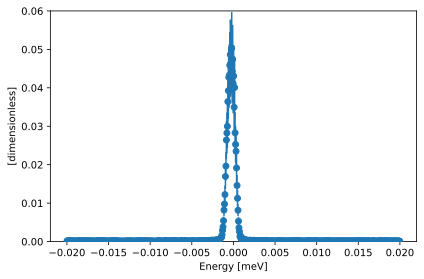

In [2]:
import scipp as sc
import numpy as np
# Load a single vanadium data file and plot it

filename = '../../IN16b_GGG_data/vanadium_Q8.dat'

data_array = np.loadtxt(filename)
EnergyValues=data_array[:, 0]
IntensityValues=data_array[:,1]
ErrorValues=data_array[:,2]

Energy=sc.array(dims=['Energy'],values=EnergyValues/1000,unit='meV')
Intensity=sc.array(dims=['Energy'],values=IntensityValues,variances=ErrorValues*ErrorValues) #The variance is the square of the uncertainty!

VanadiumData = sc.DataArray(data=Intensity, coords={'Energy': Energy})


IntensityMin=0.0
IntensityMax=0.06

start = -0.02 * sc.Unit('meV')
stop = 0.02 * sc.Unit('meV')
sc.plot(VanadiumData['Energy',start:stop],vmin=IntensityMin,vmax=IntensityMax)



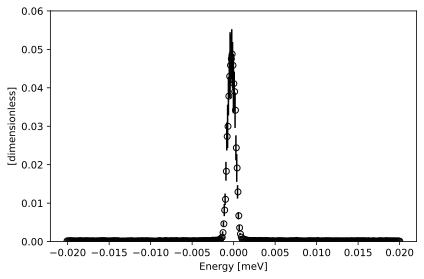

In [5]:
# Play a bit around with plot options
IntensityMin=0.0
IntensityMax=0.06
binnedVanadiumData = VanadiumData.bin(Energy=sc.scalar(1e-3*0.1, unit='meV')) 
sc.plot(binnedVanadiumData['Energy',start:stop].bins.mean(),vmin=IntensityMin,vmax=IntensityMax,marker='o',markerfacecolor='none',color='black',linestyle='none')


